## Mount your Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Libraries

In [10]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


## Access of the dataset

In [ ]:
p = Path().cwd()
dataset_dir =  p / "/content/drive/MyDrive/Capstone-2/Dataset/Lung Cancer Dataset"

In [ ]:
images = [] # create an empty list
images_name = [] # create an empty list
labels = [] # create an empty list

In [ ]:
target_dict = {
    "Malignant cases": 'Malignant',
    "Bengin cases": 'Bengin',
    "Normal cases": 'Normal',
}

## Resize images

In [ ]:
for fldr in dataset_dir.iterdir():
    current_label = target_dict[fldr.name] # get the name of the current label
    # print(current_label)
    image_number = 0
    for img in os.listdir(fldr):
        images_name.append(img)

        img = load_img(os.path.join(fldr, img), color_mode='grayscale')
        img_array = img_to_array(img)

        img_array_resized = smart_resize(img_array, (512, 512)) # resize the image to 512 by 512
        img_array_reshaped = np.reshape(img_array_resized, (512, 512)) # reshape the image from (512, 512, 1) to (512, 512)

        images.append(img_array_reshaped)# add reshaped image to list of images
        labels.append(current_label)# add label for this image to the list of labels

        image_number += 1
    print(current_label, '-', image_number)

images = np.array(images) # convert the list of images to a NumPy array
labels = np.array(labels) # convert the list of labels to a NumPy array
print("DONE")

Bengin - 120
Normal - 416


Bengin case (12).jpg


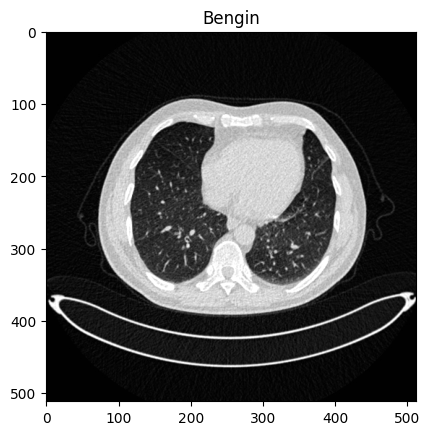

In [ ]:
# use plt.imshow() to view a few of the grayscale images
plt.imshow(images[651], cmap='gray')
plt.title(labels[651])
print(images_name[651])

In [9]:
images[651]

[[41. 41. 42. ... 41. 41. 44.]
 [43. 42. 40. ... 41. 43. 44.]
 [42. 43. 41. ... 42. 43. 43.]
 ...
 [55. 55. 56. ... 61. 60. 59.]
 [55. 56. 57. ... 59. 60. 60.]
 [57. 57. 57. ... 54. 56. 56.]]


In [ ]:
labels

array(['Bengin', 'Bengin', 'Bengin', ..., 'Malignant', 'Malignant',
       'Malignant'], dtype='<U9')

## Normalization of Images

In [11]:
images = images / 255.0

In [13]:
images[651]

array([[0.16078432, 0.16078432, 0.16470589, ..., 0.16078432, 0.16078432,
        0.17254902],
       [0.16862746, 0.16470589, 0.15686275, ..., 0.16078432, 0.16862746,
        0.17254902],
       [0.16470589, 0.16862746, 0.16078432, ..., 0.16470589, 0.16862746,
        0.16862746],
       ...,
       [0.21568628, 0.21568628, 0.21960784, ..., 0.23921569, 0.23529412,
        0.23137255],
       [0.21568628, 0.21960784, 0.22352941, ..., 0.23137255, 0.23529412,
        0.23529412],
       [0.22352941, 0.22352941, 0.22352941, ..., 0.21176471, 0.21960784,
        0.21960784]], dtype=float32)

## Lebel encoding

In [12]:
label_dict = {'Malignant': 0, 'Bengin': 1, 'Normal': 2}
labels_encoded = np.array([label_dict[label] for label in labels])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

## Model building

In [20]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
28/28 [==============================] - 9s 260ms/step - loss: 1.1677 - accuracy: 0.5781 - val_loss: 0.6015 - val_accuracy: 0.7864
Epoch 2/10
28/28 [==============================] - 7s 242ms/step - loss: 0.3837 - accuracy: 0.8415 - val_loss: 0.1594 - val_accuracy: 0.9318
Epoch 3/10
28/28 [==============================] - 7s 240ms/step - loss: 0.0738 - accuracy: 0.9749 - val_loss: 0.0386 - val_accuracy: 0.9864
Epoch 4/10
28/28 [==============================] - 7s 237ms/step - loss: 0.0161 - accuracy: 0.9954 - val_loss: 0.0385 - val_accuracy: 0.9864
Epoch 5/10
28/28 [==============================] - 7s 234ms/step - loss: 0.0196 - accuracy: 0.9943 - val_loss: 0.0346 - val_accuracy: 0.9818
Epoch 6/10
28/28 [==============================] - 7s 245ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0485 - val_accuracy: 0.9909
Epoch 7/10
28/28 [==============================] - 7s 236ms/step - loss: 0.0156 - accuracy: 0.9977 - val_loss: 0.0341 - val_accuracy: 0.9909
Epoch 

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_acc}')

7/7 [==============================] - 1s 75ms/step - loss: 0.0518 - accuracy: 0.9955

Test accuracy: 0.9954545497894287
